In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def plot(x, y, p):
  fig = plt.figure(figsize=(11, 7), dpi=100)
  ax = fig.gca(projection='3d')
  X, Y = np.meshgrid(x, y)
  surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=plt.cm.viridis,
          linewidth=0, antialiased=False)
  ax.set_xlim(0, 2)
  ax.set_ylim(0, 1)
  ax.view_init(30, 225)
  ax.set_xlabel('$x$')
  ax.set_ylabel('$y$')

In [13]:
x = np.linspace(0,2,500)
y = np.linspace(0,1,500)
[X, Y] = np.meshgrid(x,y)

def true_function(mesh):
  sum = np.zeros(mesh[0].shape)
  for i in range(1,50,2):
    sum = sum + 1/((i*np.pi)**2 * np.sinh(2*i*np.pi)) * np.sinh(i*np.pi*mesh[0]) * np.cos(i*np.pi*mesh[1])

  return mesh[0] / 4 - 4*sum

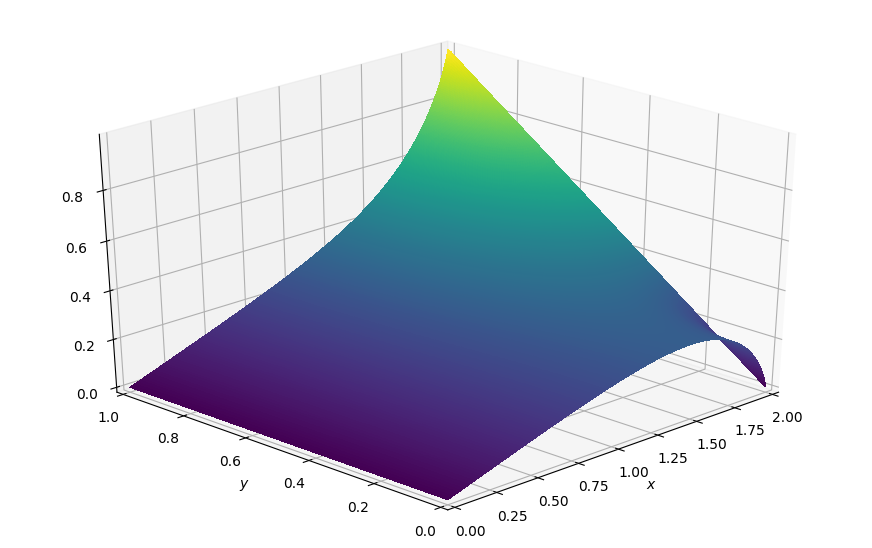

In [14]:
plot(x,y,true_function([X,Y]))

In [15]:
def laplace(p, y, dx, dy, tol=1e-5):
  norm = 1
  while norm > tol:
    p_copy = p.copy()

    p[1:-1,1:-1] = ((dy**2 * (p_copy[1:-1,2:] + p_copy[1:-1,0:-2])) + 
                    (dx**2 * (p_copy[2:,1:-1] + p_copy[0:-2,1:-1]))) / (2*(dx**2 + dy**2))
    
    p[:,0] = 0
    p[:,-1] = y
    p[0,:] = p[1,:] #as dp/dy = 0
    p[-1,:] = p[-2,:]

    norm = (np.sum(np.abs(p[:]) - np.abs(p_copy[:])) /
                np.sum(np.abs(p_copy[:])))   
  return p 

In [16]:
nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
p = np.zeros((ny, nx)) 

x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)

p[:, 0] = 0  # p = 0 @ x = 0
p[:, -1] = y  # p = y @ x = 2
p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

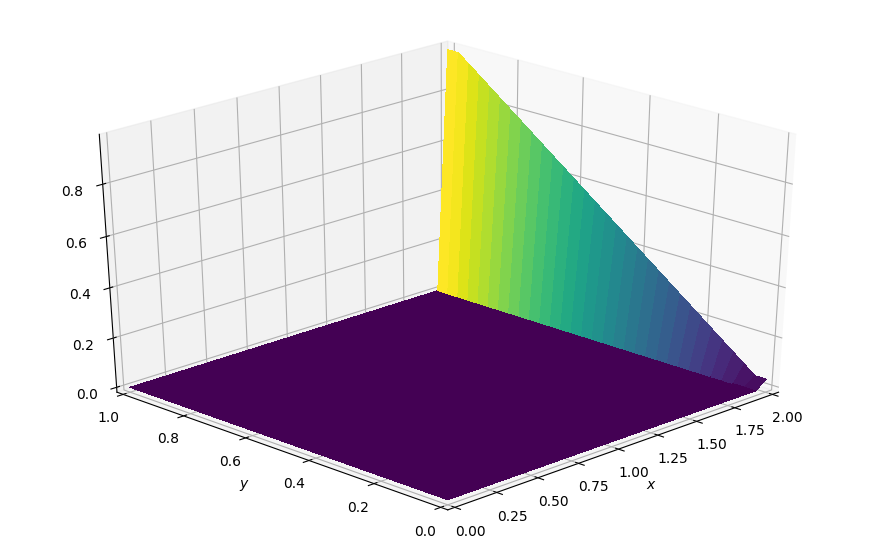

In [17]:
plot(x, y, p)


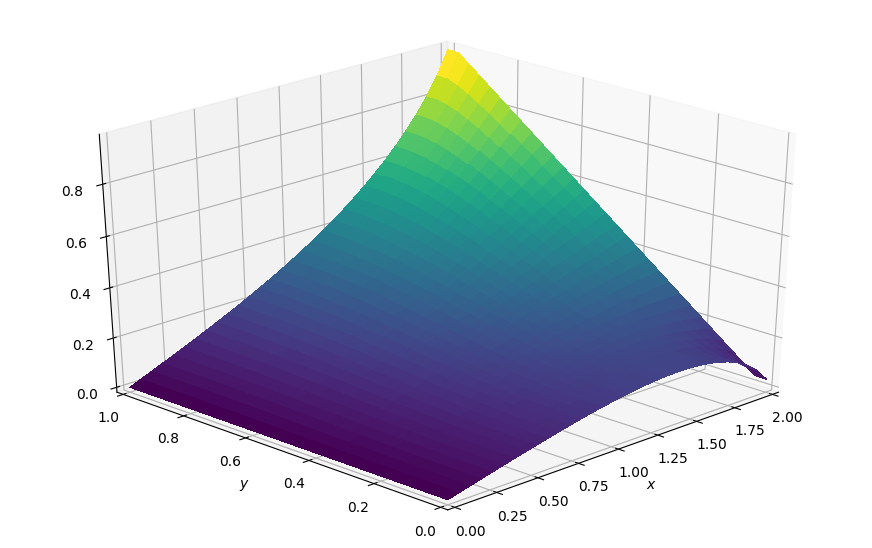

In [20]:
p = laplace(p, y, dx, dy, 1e-4)
plot(x, y, p)
